In [1]:
from knowknow import *

In [2]:
from params import *

In [3]:
from load_db import db as dta

loading variable anthro-wos-clean/_attributes from disk
loading variable anthro-wos-clean/groups from disk
loading variable anthro-wos-clean/group_reps from disk


In [16]:
dta.set_attribute("RELIABLE_DATA_STARTS_HERE", 1920)

In [25]:
dta.set_attribute("RELIABLE_DATA_ENDS_HERE", 2020)

In [21]:
from csv import DictReader

with open('G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/000 papers/2021 1 american sociologist resub/bib_to_key_map.csv') as in_f:
    rs = list(DictReader(in_f))

mp = {r['WOS']: r['BIB'] for r in rs}

In [69]:
def key2name(tname, truncate=None):
    if tname not in mp:
        return f"{tname}"
    
    if mp[tname] not in bibs:
        return f"nf2:{tname}"
    
    bib_ent = bibs[ mp[tname] ]
    
    a = bib_ent['auths_last']
    
    if len(a) > 1:
        a = ", ".join( a[:-1] ) + " & " + a[-1]
    else:
        a = a[0]
        
    y = bib_ent['year']
        
    return f"{a} ({y})"

In [4]:
def key2name(tname, truncate=None):
    return tname

In [5]:
top_df_02 = stats.top_decade_stratified(dta, 'c', percentile=0.02, yRange=(1960,2005), debug=True)

loading variable anthro-wos-clean/ind ___ c.fy from disk
141 /6494 in the top 2.0% in 1960,1970 (141 total accumulated)
158 /6970 in the top 2.0% in 1961,1971 (169 total accumulated)
175 /7457 in the top 2.0% in 1962,1972 (196 total accumulated)
158 /7876 in the top 2.0% in 1963,1973 (206 total accumulated)
183 /8384 in the top 2.0% in 1964,1974 (240 total accumulated)
190 /8957 in the top 2.0% in 1965,1975 (260 total accumulated)
222 /9529 in the top 2.0% in 1966,1976 (304 total accumulated)
233 /10268 in the top 2.0% in 1967,1977 (329 total accumulated)
234 /11056 in the top 2.0% in 1968,1978 (350 total accumulated)
268 /11945 in the top 2.0% in 1969,1979 (388 total accumulated)
274 /12844 in the top 2.0% in 1970,1980 (416 total accumulated)
280 /13984 in the top 2.0% in 1971,1981 (441 total accumulated)
314 /14987 in the top 2.0% in 1972,1982 (486 total accumulated)
353 /15959 in the top 2.0% in 1973,1983 (531 total accumulated)
347 /16924 in the top 2.0% in 1974,1984 (562 total acc

In [6]:
top_sort = top_df_02.sort_values('first_added')
top_names = list(top_sort['name'])

In [7]:
top_sort.shape

(1773, 12)

In [8]:
dead_top_02 = []

n_dead = 0
n_tot = 0

for i,r in top_sort.iterrows():
    tt = dta.trend('c', r['name'])
    B,D = tt.births_deaths(death_cutoff=0.1)
        
    n_tot += 1
    
    if len(D):
        # if they didn't die *after* they reached the top 1%, skip
        if D[-1] < r['first_added']:
            continue
        
        n_dead += 1
        dead_top_02.append(r['name'])

(n_dead / n_tot, 1-n_dead / n_tot)

(0.16130851663846588, 0.8386914833615341)

In [9]:
n_dead

286

In [10]:
len(dead_top_02)

286

# table

In [11]:
top_df_01 = stats.top_decade_stratified(dta, 'c', percentile=0.01, yRange=(1930,2005), debug=False)

(927, 12)


In [12]:
my_list = set(dead_top_02).intersection( set(top_df_01['name']) )

In [13]:
[x for x in my_list if 'Davis' in x]

[]

In [14]:
from tabulate import tabulate

In [15]:
def make_table(names, boldnames):
    
    dead_top_01 = names

    yearmin = 1950
    yearmax = 2015
    tickstep = 10

    rows = []
    rows_s = []

    auth_index = 1
    for k in sorted(dead_top_01, key=lambda x:(x, dta.trend('c', x).first)):
        myr = {}
        parts = k.split("|")
        
        myr['key'] = k

        myr['name'] = parts[0]
        myr['title'] = parts[-1]

        trend = dta.trend('c', k)

        if len(parts) <= 2:
            myr['year'] = str(trend.first) + "*"
        else:
            myr['year'] = parts[1]

        decades = [
            trend.avg_between(YY,YY+10-1)
            for YY in range(trend.first, trend.data_end-10)]

        myr['mxc'] = max(decades)
        myr['mxd'] = np.argmax(decades) + trend.first

        last_10 = trend.avg_between(2015,2020)
        myr['last_10'] = last_10

        B,D = trend.births_deaths(death_cutoff=0.1)

        myr['death'] = D[0]
        myr['deaths'] = len(D)

        #if max(decades) < 2*last_10: # skip those that aren't still sorta dead...
        #    continue

        rows.append(myr)
        
    rows_s = [
        [
            f"<b>{key2name(r['key'])}</b>" if r['key'] in boldnames else key2name(r['key']),
            #f"{r['year']}. {r['title']}",
            f"{r['mxc']:0.1f} ({r['mxd']}—{r['mxd']+10})",
            f"{r['death']}",
            #f"{r['deaths']}",
            f"{r['last_10']:0.1f}"
        ]
        for r
        in rows
    ]

    heads = ['Cited work', 'Best Decade', 'Fall', '2015-20']

    display(HTML(tabulate(rows_s, tablefmt='html', headers=heads)))

In [32]:
dta.search('c', 'Certeau')

['Certeau, M.|heterologies discour', 'Certeau, M.|practice everyday li']

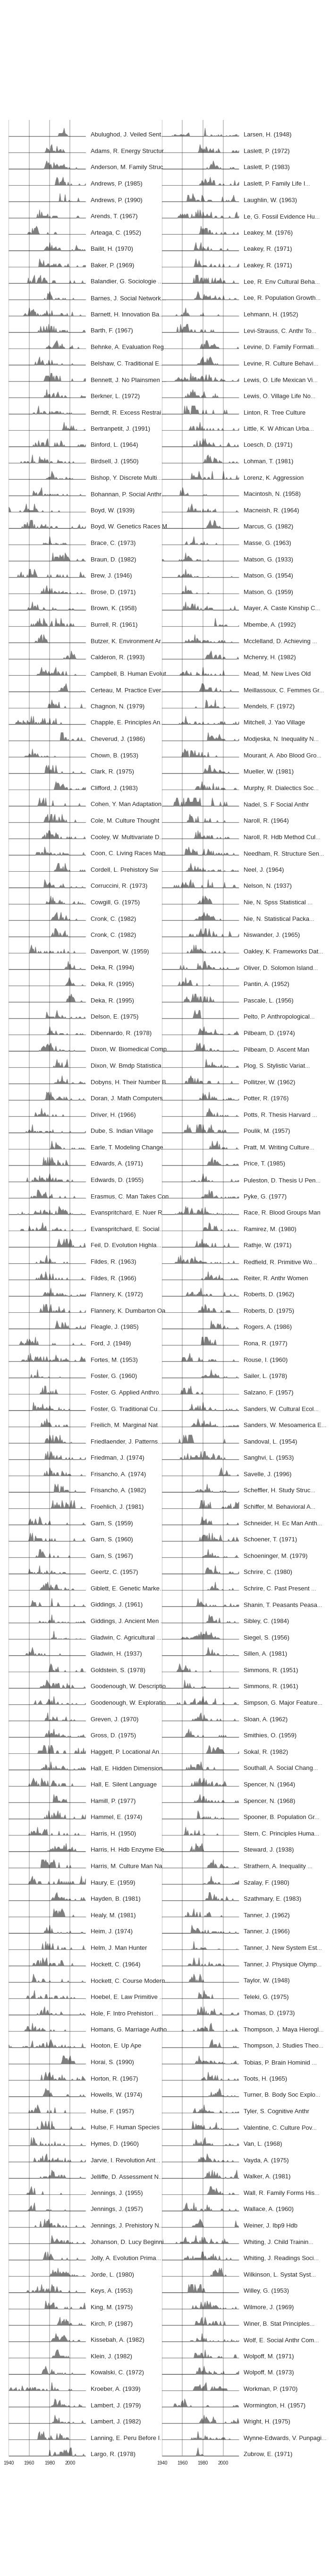

In [20]:
viz.yearly_counts_table_simp(dta, sorted(dead_top_02), yearlim=(1940,2015))
plt.savefig('top 2percent which have died1.png', dpi=150)

In [21]:
bibs={}

In [22]:
top_df_02.shape

(1773, 12)

In [23]:
len(dead_top_02)

286

In [ ]:
# this book was renamed: Harris, M.|culture man nature 1972
# johansen 1982 // it's the wrong date in my system

In [ ]:
# in env behav analysis or whatever...
# Kung bushman subsistence : an input-output analysis // Richard B. Lee
# Wynne-Edwards, V.|punpaginated 1969 WHAT!?

In [27]:
for d in sorted(dead_top_02):
    print(d, dta.trend('c',d).first)

Abulughod, J.|veiled sentiments 1989
Adams, R.|energy structure 1976
Anderson, M.|family structure 19t 1975
Andrews, P.|1985|p14 1986
Andrews, P.|1990|j hum evol,v19,p343 1990
Arends, T.|1967|p natl acad sci usa,v57,p1252 1968
Arteaga, C.|1952|ann eugenic,v16,p351 1959
Bailit, H.|1970|hum biol,v42,p626 1975
Baker, P.|1969|science,v163,p1149 1970
Balandier, G.|sociologie actuelle 1959
Barnes, J.|social networks 1975
Barnett, H.|innovation basis cul 1955
Barth, F.|1967|am anthropol,v69,p661 1969
Behnke, A.|evaluation regulatio 1977
Belshaw, C.|traditional exchange 1966
Bennett, J.|no plainsmen adaptiv 1975
Berkner, L.|1972|am hist rev,v77,p398 1975
Berndt, R.|excess restraint soc 1964
Bertranpetit, J.|1991|ann hum genet,v55,p51 1993
Binford, L.|1964|am antiquity,v29,p425 1964
Birdsell, J.|1950|cold spring harb sym,v15,p259 1952
Bishop, Y.|discrete multivariat 1977
Bohannan, P.|social anthropology 1964
Boyd, W.|1939|tabulae biol,v17,p113 1940
Boyd, W.|genetics races man 1953
Brace, C.|197

In [18]:
%pip install fa2

     |████████████████████████████████| 435 kB 3.3 MB/s            
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /home/alec/envs/kk/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-hzzijicb/fa2_2220f203ae8c4dc8987218acd910d82c/setup.py'"'"'; __file__='"'"'/tmp/pip-install-hzzijicb/fa2_2220f203ae8c4dc8987218acd910d82c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-50pxof5h
       cwd: /tmp/pip-install-hzzijicb/fa2_2220f203ae8c4dc8987218acd910d82c/
  Complete output (153 lines):
  Installing fa2 package (fastest forceatlas2 python implementation)
  
  >>>> Cython is installed?
  Yes
  
  >>>> Starting to install!
  
  running bdist_wh

In [26]:
make_table(dead_top_02, boldnames=set(top_df_01['name']))

Cited work,Best Decade,Fall,2015-20
"<b>Abulughod, J.|veiled sentiments</b>",4.1 (1989—1999),1996,0
"Adams, R.|energy structure",2.0 (1976—1986),1994,0
"<b>Anderson, M.|family structure 19t</b>",2.7 (1976—1986),1998,0
"<b>Andrews, P.|1985|p14</b>",2.8 (1986—1996),1999,0.3
"<b>Andrews, P.|1990|j hum evol,v19,p343</b>",3.3 (1990—2000),1996,0
"Arends, T.|1967|p natl acad sci usa,v57,p1252",1.4 (1968—1978),1987,0
"<b>Arteaga, C.|1952|ann eugenic,v16,p351</b>",2.0 (1959—1969),1969,0
"<b>Bailit, H.|1970|hum biol,v42,p626</b>",2.6 (1977—1987),1990,1
"Baker, P.|1969|science,v163,p1149",2.1 (1970—1980),1999,0.5
"Balandier, G.|sociologie actuelle",1.5 (1968—1978),1985,0


# updated connection to BIB

In [ ]:
len(dead_top_02)

In [ ]:
bibs = {}

In [ ]:
def key2name2(tname, truncate=None):
    if tname not in mp:
        return f"nf:{tname}"
    
    tsp = tname.split("|")
    if mp[tname] not in bibs:
        return (tsp[0], "?", tsp[1:])
    
    bib_ent = bibs[ mp[tname] ]
    
    a = bib_ent['auths_last']
    a = ", ".join( a ).replace("{","").replace("}","")
    
    y = bib_ent['year']
    
    tit = bib_ent['title']
    tit = tit.split(":")[0]
        
    return (a,y,tit)

In [ ]:
[key2name2(x) for x in sorted(dead_top_02)[:10]]

In [ ]:
len(dead_top_02)

# something else...

In [ ]:
def fmt_for_search(x):
    s = x.split("|")
    ret = []

    if len(s) == 2:
        ret += ["ti:"+" ".join( '%s*' % x for x in s[-1].split() )]
        ret += ["au:%s" % s[0].split(",")[0]]
    else:
        ret += [" ".join( 
            '"%s"' % x if not re.match( r'[vp][0-9]+', x ) else '"%s"' % x[1:] 
            for x in s[-1].split(",")[1:] )]
        ret += ["'%s'" %  x.split("|")[1]]
        ret += ["'%s'" % s[0].split(",")[0]]
        
    return " ".join(ret)

In [ ]:
from pybtex.database.input import bibtex


def bib_loop( fn ):
    #open a bibtex file
    parser = bibtex.Parser()
    bibdata = parser.parse_file(fn)

    #loop through the individual references
    for bib_id in bibdata.entries:
        b = bibdata.entries[bib_id].fields
        
        try:
            auths = bibdata.entries[bib_id].persons["author"]
            title = b["title"].replace("{","").replace("}","")
            year = int(b['year'])
            auths_last = [ x.last_names[-1] for x in bibdata.entries[bib_id].persons["author"] ]

            yield {
                'auths': auths,
                'title': title,
                'year': year,
                'auths_last': auths_last,
                'type': bibdata.entries[bib_id].type,
                'key': bib_id
            }

        # field may not exist for a reference
        except(KeyError):
            continue

bibs = {}

bfn = "G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/000 papers/2021 1 american sociologist resub/drafts 3/new_deaths.bib"

for r in bib_loop(bfn):
    bibs[ r['key'] ] = r

list(bibs.values())[-1]